In [5]:
import numpy as np
import pandas as pd
import scipy.io
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sb
from scipy.stats import entropy
import sys
sys.path.append('../')
from entropyClass import EntropyAnalysis

### Aims

This notebook aims to evaluate the ability of LDA to distinguish doublets: 

* Aim 1: Do we indeed get higher entropy for doublets of the two cell types?

* Aim 2: Can we actually distinguish doublets if we interpret the topics and link topics to a cell type?

In [3]:
synthetic_data = EntropyAnalysis("doublets_original.csv")

In [4]:
synthetic_data.counts

,AL627309.1,AP006222.2,RP11-206L10.2,RP11-206L10.9,LINC00115,NOC2L,KLHL17,PLEKHN1,RP11-54O7.17,HES4,...,MT-ND4L,MT-ND4,MT-ND5,MT-ND6,MT-CYB,AC145212.1,AL592183.1,AL354822.1,PNRC2.1,SRSF10.1
AAACATACAACCAC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,10.0,1.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0
AAACATTGAGCTAC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,33.0,1.0,0.0,8.0,0.0,1.0,0.0,0.0,0.0
AAACATTGATCAGC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3.0,2.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0
AAACCGTGCTTCCG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,3.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
AAACCGTGTATGCG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
T_B_doublet296,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.5,0.0,0.5,3.0,0.0,0.5,0.0,0.0,0.0
T_B_doublet297,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.5,0.0,0.0,2.5,0.0,0.5,0.0,0.0,0.0
T_B_doublet298,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3.0,0.0,0.0,3.5,0.0,0.0,0.0,0.0,0.0
T_B_doublet299,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.5,0.5,0.0,5.5,0.0,0.5,0.0,0.0,0.0


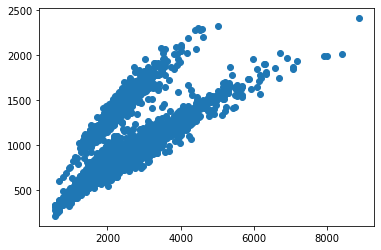

In [9]:
#quite an easy example here I suppose if we look at genes and cells total counts and number of genes
plt.plot(synthetic_data.counts.sum(axis=1),synthetic_data.counts.astype(bool).sum(axis=1),'o')

In [10]:
### group cells by celltypes and annotate: are there topics that are cell type specific 

metadata = pd.read_csv("meta_data_original_cells.csv")

In [12]:
metadata

,Unnamed: 0,orig.ident,nCount_RNA,nFeature_RNA,seurat_annotations,percent.mt,RNA_snn_res.0.5,seurat_clusters
0,AAACATACAACCAC,pbmc3k,2419,779,Memory CD4 T,3.017776,0,0
1,AAACATTGAGCTAC,pbmc3k,4903,1352,B,3.793596,3,3
2,AAACATTGATCAGC,pbmc3k,3147,1129,Memory CD4 T,0.889736,2,2
3,AAACCGTGCTTCCG,pbmc3k,2639,960,CD14+ Mono,1.743085,1,1
4,AAACCGTGTATGCG,pbmc3k,980,521,NK,1.224490,6,6
...,...,...,...,...,...,...,...,...
2633,TTTCGAACTCTCAT,pbmc3k,3459,1153,CD14+ Mono,2.110437,1,1
2634,TTTCTACTGAGGCA,pbmc3k,3443,1224,B,0.929422,3,3
2635,TTTCTACTTCCTCG,pbmc3k,1684,622,B,2.197150,3,3
2636,TTTGCATGAGAGGC,pbmc3k,1022,452,B,2.054795,3,3


In [14]:
synthetic_data.counts.iloc[2638:].index.str.split("_")

Index([ ['B', 'Mono', 'doublet1'],  ['B', 'Mono', 'doublet2'],
        ['B', 'Mono', 'doublet3'],  ['B', 'Mono', 'doublet4'],
        ['B', 'Mono', 'doublet5'],  ['B', 'Mono', 'doublet6'],
        ['B', 'Mono', 'doublet7'],  ['B', 'Mono', 'doublet8'],
        ['B', 'Mono', 'doublet9'], ['B', 'Mono', 'doublet10'],
       ...
         ['T', 'B', 'doublet291'],   ['T', 'B', 'doublet292'],
         ['T', 'B', 'doublet293'],   ['T', 'B', 'doublet294'],
         ['T', 'B', 'doublet295'],   ['T', 'B', 'doublet296'],
         ['T', 'B', 'doublet297'],   ['T', 'B', 'doublet298'],
         ['T', 'B', 'doublet299'],   ['T', 'B', 'doublet300']],
      dtype='object', length=750)

In [15]:
cellNames = list(synthetic_data.counts.iloc[2638:].index)

In [16]:
cellNamesFixed = [" ".join(a.split("_")[0:2]) for a in cellNames]

In [18]:
metadata = metadata.append(list(synthetic_data.counts.iloc[2638:].index))

In [19]:
metadata['seurat_annotations'].iloc[2638:] = cellNamesFixed

/software/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [20]:
metadata[0].iloc[:2638] = metadata['Unnamed: 0'][:2638]

/software/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [21]:
metadata = metadata.sort_values(by="seurat_annotations")

In [22]:
metadata.iloc[1881]['seurat_annotations']

'Memory CD4 T'

In [23]:
metadata['seurat_annotations'].unique()

array(['B', 'B Mono', 'CD14+ Mono', 'CD8 T', 'DC', 'FCGR3A+ Mono',
       'Memory CD4 T', 'NK', 'Naive CD4 T', 'Platelet', 'T B', 'T Mono'],
      dtype=object)

In [29]:
synthetic_data.preprocessing()

In [30]:
n_topics = 20
synthetic_data.fit_LDA(n_topics=n_topics,doc_topic_prior=1/20, topic_word_prior=10)

In [31]:
synthetic_data.weights = synthetic_data.weights.reindex(metadata[0])

In [32]:
entropyResults = pd.DataFrame(synthetic_data.calculateEntropy(),index=synthetic_data.counts.index)

In [33]:
entropyResults = entropyResults.reindex(metadata[0])

In [34]:
entropyResults['type'] = metadata['seurat_annotations'].values

In [35]:
entropyResults["type"]

0
GGCAATACGCTAAC            B
CAGTGATGGACGGA            B
GAGTCTGATTTGGG            B
CTATAAGATCGTTT            B
CAGTGATGTAAGGA            B
                      ...  
T_Mono_doublet130    T Mono
T_Mono_doublet129    T Mono
T_Mono_doublet128    T Mono
T_Mono_doublet138    T Mono
T_Mono_doublet23     T Mono
Name: type, Length: 3388, dtype: object

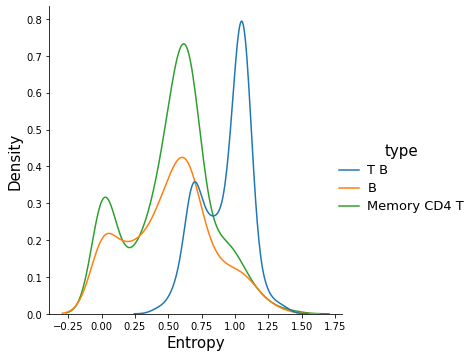

In [53]:
plot = sb.displot(entropyResults[entropyResults["type"].isin(["T B","B","Memory CD4 T",])],x=entropyResults[0],
                           hue="type",hue_order=["T B","B","Memory CD4 T"],kind='kde', aspect=1)

plt.setp(plot.legend.texts,fontsize=13)
plt.setp(plot.legend.get_title(), fontsize=15)
plt.xlabel("Entropy",size=15)
plt.ylabel("Density",size=15)
plt.savefig("T_B.png",dpi=300)

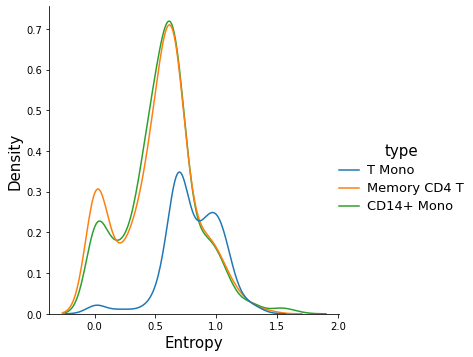

In [52]:
plot2 = sb.displot(entropyResults[entropyResults["type"].isin(["T Mono","Memory CD4 T","CD14+ Mono",])],x=entropyResults[0],
                           hue="type",hue_order=["T Mono","Memory CD4 T","CD14+ Mono"],kind="kde")
plt.setp(plot2.legend.texts,fontsize=13)
plt.setp(plot2.legend.get_title(), fontsize=15)
plt.xlabel("Entropy",size=15)
plt.ylabel("Density",size=15)
plt.savefig("T_Mono.png",dpi=300)


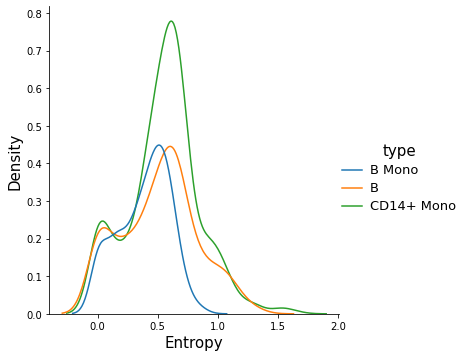

In [54]:
plot3 = sb.displot(entropyResults[entropyResults["type"].isin(["B Mono","B","CD14+ Mono",])],x=entropyResults[0],
                           hue="type",hue_order=["B Mono","B","CD14+ Mono"],kind="kde")

plt.setp(plot3.legend.texts,fontsize=13)
plt.setp(plot3.legend.get_title(), fontsize=15)
plt.xlabel("Entropy",size=15)
plt.ylabel("Density",size=15)
plt.savefig("B_Mono.png",dpi=300)